In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

### Reading Dataset: Breast Cancer Diagnosis

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.data', header=None)
data.columns=['Id number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data2 = data.apply(pd.to_numeric, errors='coerce') #Convert argument to numeric type and invalid parsing is set as NaN
data = data2.dropna() #Rewrrite previous data entry with new complete data 

#Patient Number is not required
del data['Id number']

# Display the first few records
data.head(3)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2


In [9]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000
mean,4.107143,2.405844,2.597403,2.384740,2.831169,3.129870,3.058442,2.422078,1.391234,0.279221
std,2.670199,2.179930,2.354085,2.448101,1.799928,3.430521,2.126066,2.664509,1.307087,0.448981
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
75%,5.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,1.000000,1.000000
max,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


### Remove outlier data

Using interquartile range to calculate and remove outliers.
Using Features "Bare Nuclei" and "Cell Size" to remove outliers

In [3]:
# Removing outliers from quality column. Find data points with extreme high or low values
feature = "Bare Nuclei"

# Calculate the 25th and 75th percentile of the column
Q1, Q3 = np.percentile(data[feature], q=25), np.percentile(data[feature], q=75) 

# Select and Calculate outlier range using interquartile range
outlier_range =   (Q3 - Q1)

# Outliers in data
num_data = data[((data["Bare Nuclei"] < (Q1 - outlier_range)) | (data["Bare Nuclei"] > (Q3 + outlier_range)))].shape[0]

# Remove outliers outside the outlier range
data = data[~((data["Bare Nuclei"] < (Q1 - outlier_range)) | (data["Bare Nuclei"] > (Q3 + outlier_range)))].reset_index(drop = True)

# Display number of outliers
print("Number of outliers removed: ", num_data)

Number of outliers removed:  0


In [4]:
# Removing outliers from quality column. Find data points with extreme high or low values
feature = "Uniformity of Cell Size"

# Calculate the 25th and 75th percentile of the column
Q1, Q3 = np.percentile(data[feature], q=25), np.percentile(data[feature], q=75) 

# Select and Calculate outlier range using interquartile range
outlier_range =   (Q3 - Q1)

# Outliers in data
num_data = data[((data["Uniformity of Cell Size"] < (Q1 - outlier_range)) | (data["Uniformity of Cell Size"] > (Q3 + outlier_range)))].shape[0]

# Remove outliers outside the outlier range
data = data[~((data["Uniformity of Cell Size"] < (Q1 - outlier_range)) | (data["Uniformity of Cell Size"] > (Q3 + outlier_range)))].reset_index(drop = True)

# Display number of outliers
print("Number of outliers removed: ", num_data)

Number of outliers removed:  67


### Update target variable from Categorical (2,4) to Categorical (0,1)

In [5]:
#Using lambda function to change values in the Class column
data["Class"]=1*(data["Class"]>3)

#Display the changed records
data[["Class"]].tail()


,Class
611,0
612,0
613,0
614,1
615,1


### Checking number of total breast cancer data and percentage of benign data

In [6]:
#Check number of entries in a cloumn
num_of_patients = data.shape[0]

# Number of benign breast cancer data
benign_number=data.loc[(data['Class']==0)] #Accessing Column using label
number_benign=benign_number.shape[0] #Returns Dimensionality of DataFrame in tuple format

# Number of malignant breast cancer data
malignant_number=data.loc[(data['Class']==1)]
number_malignant=malignant_number.shape[0]

# Percentage of benign Class data
benign_percentage = number_benign*100/num_of_patients

# Percentage of malignant Class data
malignant_percentage = number_malignant*100/num_of_patients

# Print the results
print("Total number of patients: {}".format(num_of_patients))
print("Number of benign tumor patient: {}".format(number_benign))
print("Number of malignant tumor patient: {}".format(number_malignant))
print("Percentage of benign tumor patient: {:.2f}%".format(benign_percentage))
print("Percentage of malignant tumor patient: {:.2f}%".format(malignant_percentage))

Total number of patients: 616
Number of benign tumor patient: 444
Number of malignant tumor patient: 172
Percentage of benign tumor patient: 72.08%
Percentage of malignant tumor patient: 27.92%


### Plotting Pie Chart to show distribution of benign and malignant classes

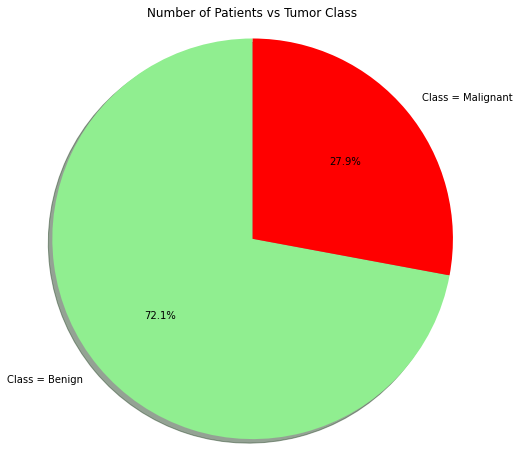

In [7]:
# Data to plot
plt.figure(figsize = (8,8))
labels = 'Class = Benign', 'Class = Malignant'
plt.title('Number of Patients vs Tumor Class')
sizes = [number_benign, number_malignant]
colors = ['lightgreen', 'red']

# Plot pie chart
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

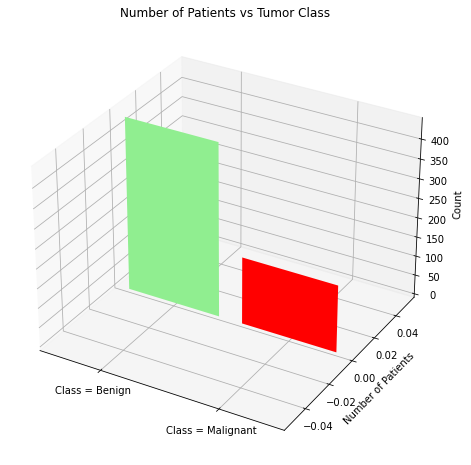

In [73]:
from mpl_toolkits.mplot3d import Axes3D

# Data to plot
labels = ['Class = Benign', 'Class = Malignant']
sizes = [number_benign, number_malignant]

# Create a 3D bar chart
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x_pos = range(len(labels))

# Plot the bars
ax.bar(x_pos, sizes, zdir='y', color=['lightgreen', 'red'])

# Set labels and title
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Patients')
ax.set_zlabel('Count')
ax.set_title('Number of Patients vs Tumor Class')

plt.show()


### Understanding Individual Distributions

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Clump Thickness', ylabel='Density'>

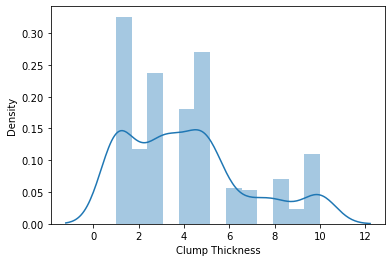

In [8]:
sns.distplot(data['Clump Thickness'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Density'>

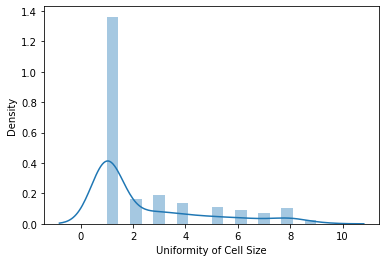

In [10]:
sns.distplot(data['Uniformity of Cell Size'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Density'>

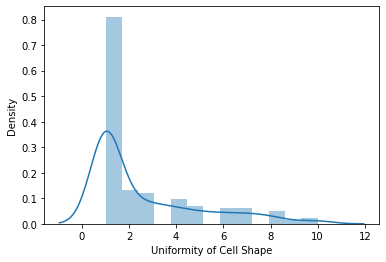

In [11]:
sns.distplot(data['Uniformity of Cell Shape'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marginal Adhesion', ylabel='Density'>

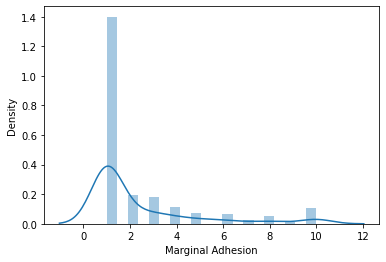

In [12]:
sns.distplot(data['Marginal Adhesion'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Single Epithelial Cell Size', ylabel='Density'>

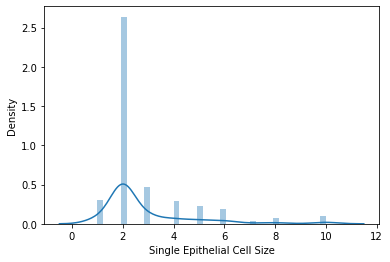

In [13]:
sns.distplot(data['Single Epithelial Cell Size'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bare Nuclei', ylabel='Density'>

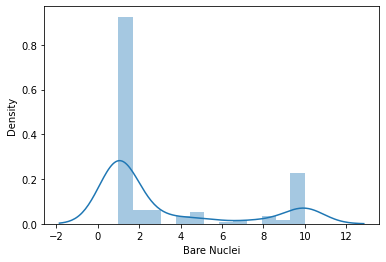

In [13]:
sns.distplot(data['Bare Nuclei'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bland Chromatin', ylabel='Density'>

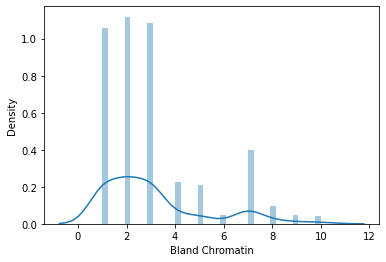

In [14]:
sns.distplot(data['Bland Chromatin'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Normal Nucleoli', ylabel='Density'>

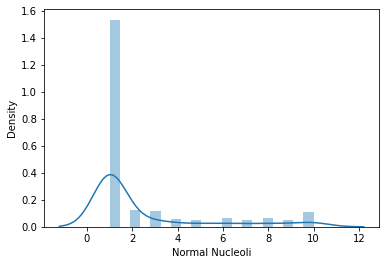

In [15]:
sns.distplot(data['Normal Nucleoli'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mitoses', ylabel='Density'>

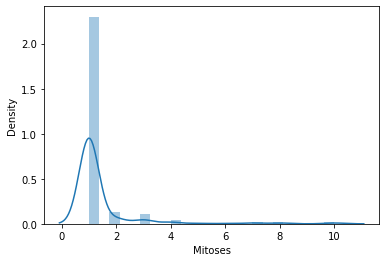

In [16]:
sns.distplot(data['Mitoses'])

### Correlation matrix output shows following behaviour:

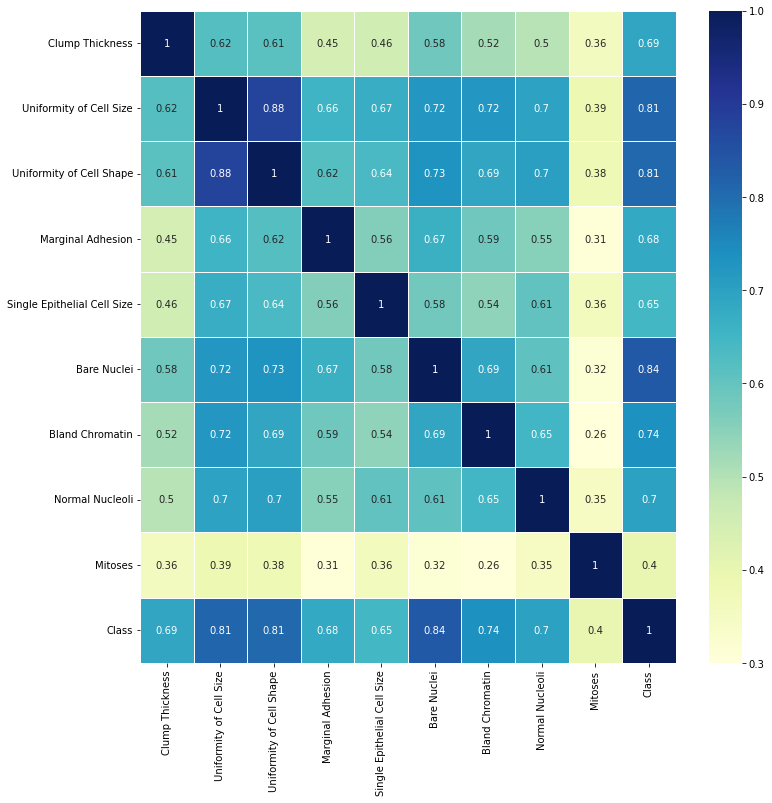

In [17]:
correlation = data.corr()
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0.5, linecolor="white",vmin=0.3, cmap="YlGnBu")

In [18]:
# Train Test split

# Select 80% for training
data_train = data.sample(frac = 0.8)
x_train = np.array(data_train.iloc[:, :-1])
y_train = np.array(data_train["Class"])

# Select rest of data for testing
data_test = data.drop(data_train.index)
x_test = np.array(data_test.iloc[:, :-1])
y_test = np.array(data_test["Class"])

# Show number of training and testing data points
print("Number of Training data points: ", len(x_train))
print("Number of Testing data points: ", len(x_test))

Number of Training data points:  493
Number of Testing data points:  123


# Wraper

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Generate a sample dataset

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Create an RFE object with the SVM classifier
rfe = RFE(estimator=svm_classifier, n_features_to_select=5)  # Select the top 5 features

# Fit the RFE model and transform the training data
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Train the SVM classifier on the selected features
svm_classifier.fit(X_train_rfe, y_train)

# Use the trained model to make predictions on the test set
X_test_rfe = rfe.transform(X_test)
y_pred = svm_classifier.predict(X_test_rfe)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.775


# Data segmentation

In [20]:
segments = data.groupby('Class')

In [21]:
for name, group in segments:
    print(f"\nSegment {name}:\n{group}")


Segment 0:
     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
609                1                        1                         1   
610                3                        1                         1   
611                3                        1                         1   
612                3                        1                         1   
613                2                        1                         1   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                  

# Feature Selection

In [56]:
corr = data.corr()
corr.head()
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

np.random.seed(123)

<AxesSubplot:>

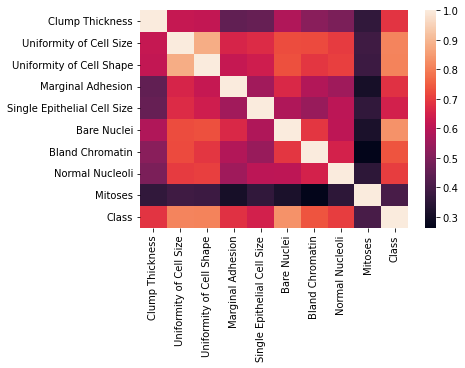

In [57]:
sns.heatmap(corr)

In [58]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [59]:
selected_columns = data.columns[columns]
selected_columns.shape

(10,)

In [60]:
data = data[selected_columns]

In [61]:
selected_columns = selected_columns[1:]

In [62]:
import statsmodels.regression.linear_model as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [63]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [64]:
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,0]

In [65]:
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,0]

In [66]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

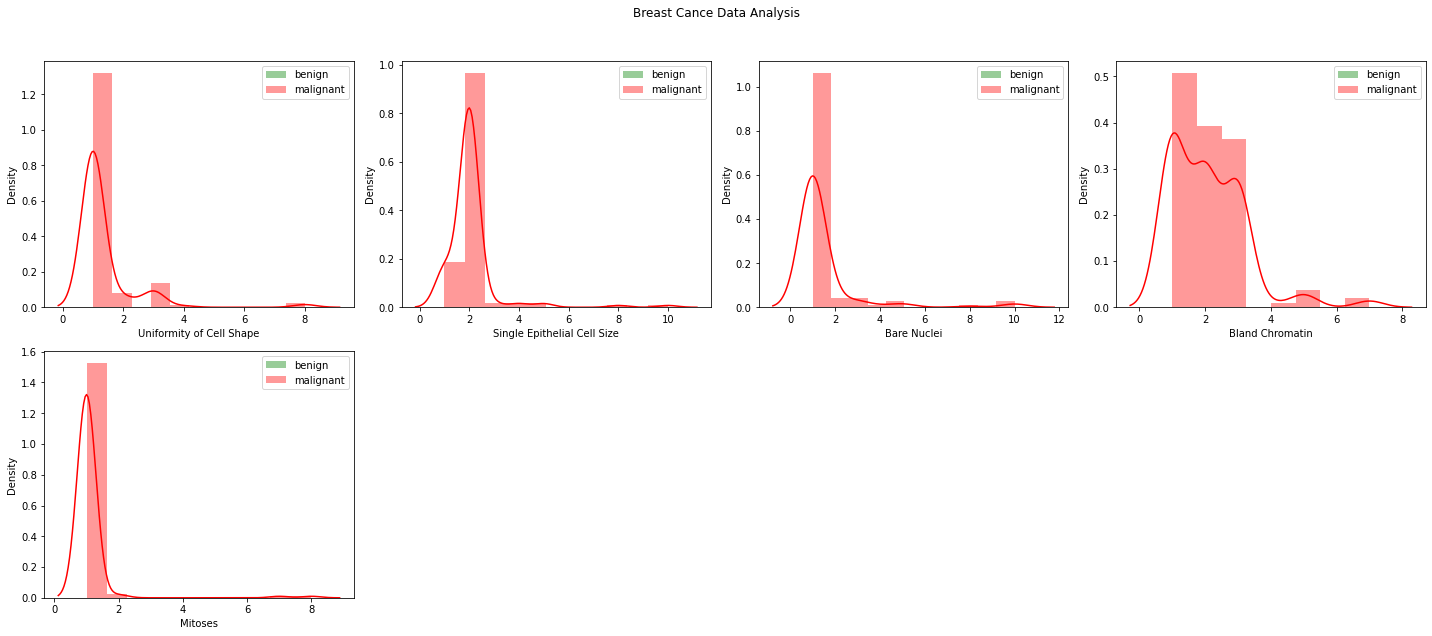

In [67]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

# Task 2:  Implementing 3 models (Classification techniques)

### Implementation - Logistic regression 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Apply logistic regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_normalized, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_normalized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 82.50%
Confusion Matrix:
 [[81 23]
 [12 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       104
           1       0.79      0.88      0.83        96

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200



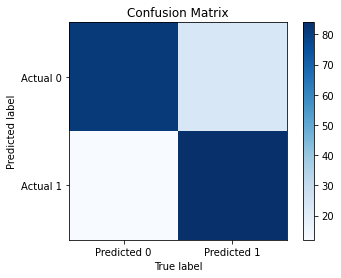

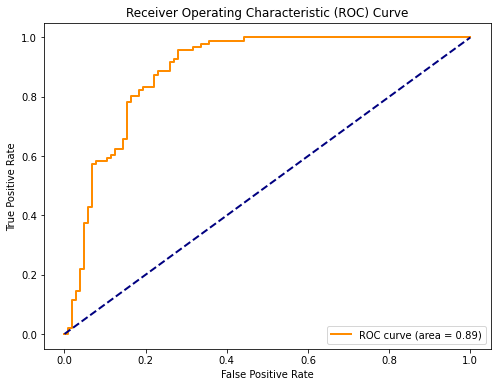

In [23]:
from sklearn.metrics import roc_curve, auc

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
    plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(conf_matrix)

# Plot ROC curve
y_pred_prob = logreg.predict_proba(X_test_normalized)[:, 1]
plot_roc_curve(y_test, y_pred_prob)


### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap


# Apply k-Nearest Neighbors
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_normalized, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_normalized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 91.00%
Confusion Matrix:
 [[94 10]
 [ 8 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       104
           1       0.90      0.92      0.91        96

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



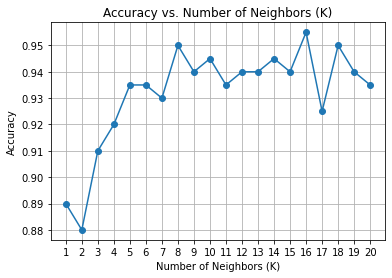

In [30]:
# Define a range of values for k
k_values = range(1, 21)

# Store accuracies for each k value
accuracies = []

# Apply k-Nearest Neighbors for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_normalized, y_train)
    y_pred = knn.predict(X_test_normalized)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Apply random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_normalized, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_normalized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 92.00%
Confusion Matrix:
 [[93 11]
 [ 5 91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       104
           1       0.89      0.95      0.92        96

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



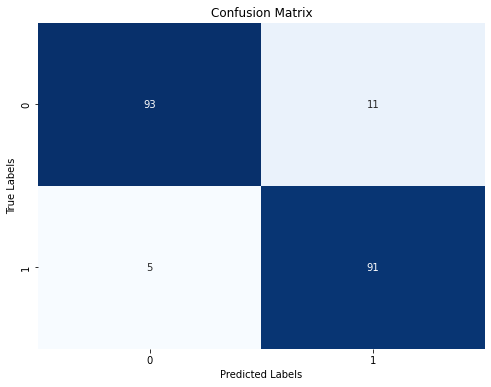

In [53]:
# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Selecting columns based on p-value


# 2 data reduction techniques

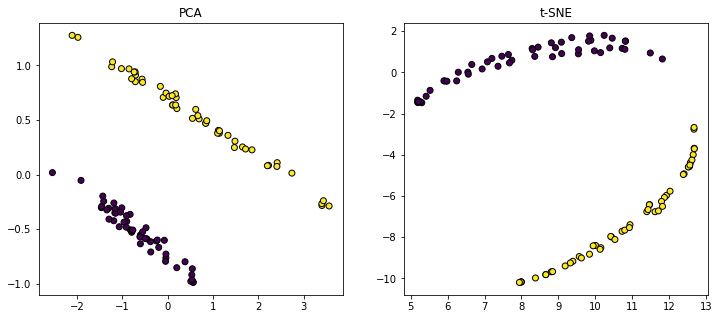

In [69]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Method 1: Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Method 2: t-Distributed Stochastic Neighbor Embedding (t-SNE)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plotting the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA')

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('t-SNE')

plt.show()

# Clustering Columns using kmean, hc, and dbscan

In [82]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels_train = kmeans.fit_predict(X_train_normalized)

# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=2)
hc_labels_train = hc.fit_predict(X_train_normalized)

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels_train = dbscan.fit_predict(X_train_normalized)

# Evaluate the clusters using silhouette score
print("Silhouette Score - KMeans:", silhouette_score(X_train_normalized, kmeans_labels_train))
print("Silhouette Score - Hierarchical:", silhouette_score(X_train_normalized, hc_labels_train))
print("Silhouette Score - DBSCAN:", silhouette_score(X_train_normalized, dbscan_labels_train))

# Print the cluster labels for one of the methods (e.g., KMeans)
print("KMeans Cluster Labels for Training Data:\n", kmeans_labels_train)

# You can apply the clustering labels to the test set if needed
# kmeans_labels_test = kmeans.predict(X_test_normalized)


Silhouette Score - KMeans: 0.49612002641824293
Silhouette Score - Hierarchical: 0.4820718604145002
Silhouette Score - DBSCAN: 0.4002010128530135
KMeans Cluster Labels for Training Data:
 [1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 1]


Accuracy - KMeans: 0.725
Accuracy - Hierarchical: 0.1375
Accuracy - DBSCAN: 0.0


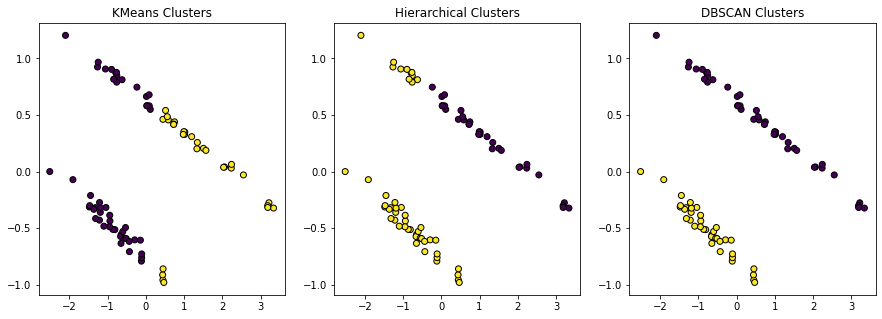

In [83]:


# Evaluate the clustering results using ground truth labels (y_train)
accuracy_kmeans = accuracy_score(y_train, kmeans_labels_train)
accuracy_hc = accuracy_score(y_train, hc_labels_train)
accuracy_dbscan = accuracy_score(y_train, dbscan_labels_train)

print("Accuracy - KMeans:", accuracy_kmeans)
print("Accuracy - Hierarchical:", accuracy_hc)
print("Accuracy - DBSCAN:", accuracy_dbscan)

# Visualize the clusters using PCA for 2D plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_normalized)

plt.figure(figsize=(15, 5))

# Plot KMeans clusters
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels_train, cmap='viridis', edgecolor='k')
plt.title('KMeans Clusters')

# Plot Hierarchical clusters
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels_train, cmap='viridis', edgecolor='k')
plt.title('Hierarchical Clusters')

# Plot DBSCAN clusters
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels_train, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clusters')

plt.show()


# Cluster rows using pca, kmeans

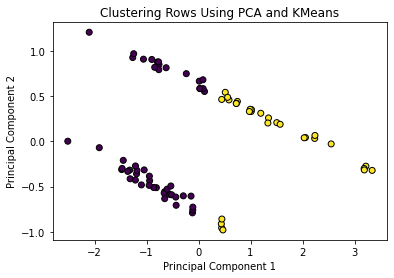

    Cluster
0         1
1         1
2         1
3         0
4         0
..      ...
75        0
76        0
77        1
78        0
79        1

[80 rows x 1 columns]


In [84]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Choose the number of components
X_pca = pca.fit_transform(X_train_normalized)

# Apply KMeans clustering on the reduced-dimensional data
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title('Clustering Rows Using PCA and KMeans')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print the cluster labels for each row
clustered_data = pd.DataFrame({'Cluster': labels}, index=range(len(labels)))
print(clustered_data)


In [86]:
# Calculate the percentage of points in each cluster
cluster_percentage = clustered_data['Cluster'].value_counts(normalize=True) * 100

# Display the percentage
print("Percentage of points in each cluster:")
print(cluster_percentage)


Percentage of points in each cluster:
0    63.75
1    36.25
Name: Cluster, dtype: float64
